In [1]:
import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import sys
#!{sys.executable} -m pip install librosa
import librosa
import librosa.display
import ast
#!{sys.executable} -m pip install utils
import utils
#!{sys.executable} -m pip install squarify
import squarify
#!{sys.executable} -m pip install pandas_profiling
import pandas_profiling

pd.set_option('display.max_columns',None)

%matplotlib inline

In [2]:
def load(filepath):

    filename = os.path.basename(filepath)

    if 'echonest' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'genres' in filename:
        return pd.read_csv(filepath, index_col=0)

    if 'tracks' in filename:
        tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])

        COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'),
                   ('track', 'genres'), ('track', 'genres_all')]
        for column in COLUMNS:
            tracks[column] = tracks[column].map(ast.literal_eval)

        COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
                   ('album', 'date_created'), ('album', 'date_released'),
                   ('artist', 'date_created'), ('artist', 'active_year_begin'),
                   ('artist', 'active_year_end')]
        for column in COLUMNS:
            tracks[column] = pd.to_datetime(tracks[column])

        SUBSETS = ('small', 'medium', 'large')
        try:
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                    'category', categories=SUBSETS, ordered=True)
        except (ValueError, TypeError):
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                     pd.CategoricalDtype(categories=SUBSETS, ordered=True))

        COLUMNS = [('track', 'genre_top'), ('track', 'license'),
                   ('album', 'type'), ('album', 'information'),
                   ('artist', 'bio')]
        for column in COLUMNS:
            tracks[column] = tracks[column].astype('category')

        return tracks
    
# Directory where mp3s are stored

AUDIO_DIR = os.environ.get('fma_small')

# Load metadata

tracks = load('C:\\Users\\julia.wlastowska\\Desktop\\inz\\fma_metadata\\tracks.csv')
genres = load('C:\\Users\\julia.wlastowska\\Desktop\\inz\\fma_metadata\\genres.csv')
echonest = load('C:\\Users\\julia.wlastowska\\Desktop\\inz\\fma_metadata\\echonest.csv')

tracks.shape, genres.shape, echonest.shape

((106574, 52), (163, 4), (13129, 249))

In [3]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   (album, comments)            106574 non-null  int64         
 1   (album, date_created)        103045 non-null  datetime64[ns]
 2   (album, date_released)       70294 non-null   datetime64[ns]
 3   (album, engineer)            15295 non-null   object        
 4   (album, favorites)           106574 non-null  int64         
 5   (album, id)                  106574 non-null  int64         
 6   (album, information)         83149 non-null   category      
 7   (album, listens)             106574 non-null  int64         
 8   (album, producer)            18060 non-null   object        
 9   (album, tags)                106574 non-null  object        
 10  (album, title)               105549 non-null  object        
 11  (album, tracks)           

In [4]:
tracks=tracks.drop(columns=[('album', 'comments')])
tracks=tracks.drop(columns=[('album', 'date_released')])
tracks=tracks.drop(columns=[('album', 'date_created')])
tracks=tracks.drop(columns=[('album', 'engineer')])
tracks=tracks.drop(columns=[('album', 'favorites')])
tracks=tracks.drop(columns=[('album', 'id')])
tracks=tracks.drop(columns=[('album', 'information')])
tracks=tracks.drop(columns=[('album', 'producer')])
tracks=tracks.drop(columns=[('album', 'tracks')])
tracks=tracks.drop(columns=[('album', 'type')])
tracks=tracks.drop(columns=[('album', 'tags')])
tracks=tracks.drop(columns=[('artist', 'active_year_begin')])
tracks=tracks.drop(columns=[('artist', 'active_year_end')])
tracks=tracks.drop(columns=[('artist', 'associated_labels')])
tracks=tracks.drop(columns=[('artist', 'bio')])
tracks=tracks.drop(columns=[('artist', 'comments')])
tracks=tracks.drop(columns=[('artist', 'date_created')])
tracks=tracks.drop(columns=[('artist', 'members')])
tracks=tracks.drop(columns=[('artist', 'related_projects')])
tracks=tracks.drop(columns=[('artist', 'tags')])
tracks=tracks.drop(columns=[('artist', 'website')])
tracks=tracks.drop(columns=[('artist', 'wikipedia_page')])
tracks=tracks.drop(columns=[('track', 'comments')])
tracks=tracks.drop(columns=[('track', 'composer')])
tracks=tracks.drop(columns=[('track', 'date_recorded')])
tracks=tracks.drop(columns=[('track', 'information')])
tracks=tracks.drop(columns=[('track', 'license')])
tracks=tracks.drop(columns=[('track', 'lyricist')])
tracks=tracks.drop(columns=[('track', 'number')])
tracks=tracks.drop(columns=[('track', 'tags')])
tracks=tracks.drop(columns=[('track', 'publisher')])

In [5]:
tracks=tracks.drop(columns=[('album', 'listens')])
tracks=tracks.drop(columns=[('album', 'title')])
tracks=tracks.drop(columns=[('artist', 'favorites')])
tracks=tracks.drop(columns=[('artist', 'id')])
tracks=tracks.drop(columns=[('artist', 'latitude')])
tracks=tracks.drop(columns=[('artist', 'location')])
tracks=tracks.drop(columns=[('artist', 'longitude')])
tracks=tracks.drop(columns=[('artist', 'name')])
tracks=tracks.drop(columns=[('set', 'split')])
tracks=tracks.drop(columns=[('set', 'subset')])

In [6]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   (track, bit_rate)       106574 non-null  int64         
 1   (track, date_created)   106574 non-null  datetime64[ns]
 2   (track, duration)       106574 non-null  int64         
 3   (track, favorites)      106574 non-null  int64         
 4   (track, genre_top)      49598 non-null   category      
 5   (track, genres)         106574 non-null  object        
 6   (track, genres_all)     106574 non-null  object        
 7   (track, interest)       106574 non-null  int64         
 8   (track, language_code)  15024 non-null   object        
 9   (track, listens)        106574 non-null  int64         
 10  (track, title)          106573 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(5), object(4)
memory usage: 9.0+ MB


In [7]:
tracks.columns = tracks.columns.droplevel()

In [8]:
tracks.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
genres

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5
...,...,...,...,...
1032,60,102,Turkish,2
1060,30,46,Tango,2
1156,26,130,Fado,2


In [10]:
genres = genres.sort_values(by='#tracks', ascending=False)
genres

,#tracks,parent,title,top_level
genre_id,,,,
38,38154,0,Experimental,38
15,34413,0,Electronic,15
12,32923,0,Rock,12
1235,14938,0,Instrumental,1235
10,13845,0,Pop,10
...,...,...,...,...
493,4,651,Western Swing,9
173,4,86,N. Indian Traditional,2
377,1,19,Deep Funk,14


In [11]:
genresrock=genres.loc[genres['top_level']==12]
genresrock.sort_values(by='#tracks',ascending=False)

,#tracks,parent,title,top_level
genre_id,,,,
12,32923,0,Rock,12
25,9261,12,Punk,12
27,6041,12,Lo-Fi,12
66,5432,12,Indie-Rock,12
85,3548,12,Garage,12
58,2502,12,Psych-Rock,12
45,2469,12,Loud-Rock,12
70,2230,12,Industrial,12
53,2071,45,Noise-Rock,12


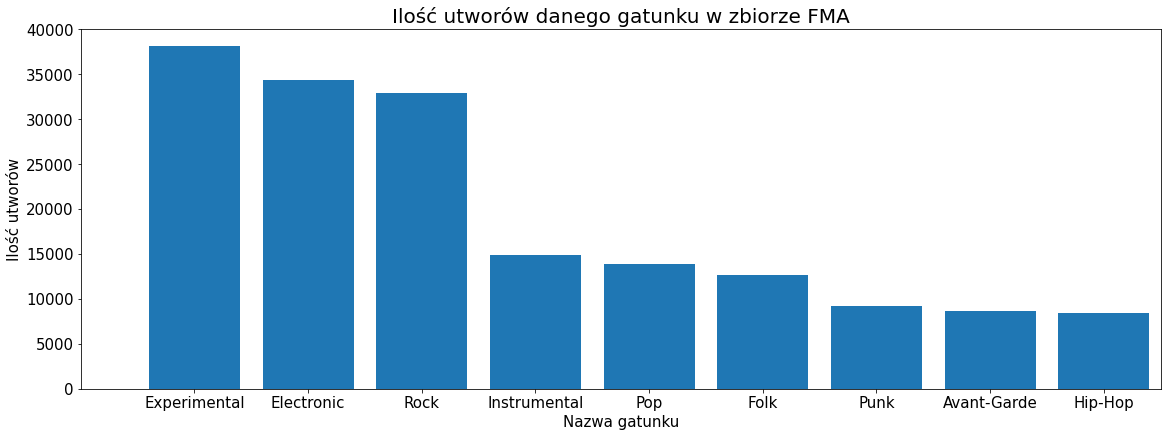

In [39]:
# wykres utworow per genre
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(genres.title,genres['#tracks'])
plt.xlim([-1,8.5])
plt.title('Ilość utworów danego gatunku w zbiorze FMA',fontsize=20)
plt.xlabel('Nazwa gatunku',fontsize=15)
plt.ylabel('Ilość utworów',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

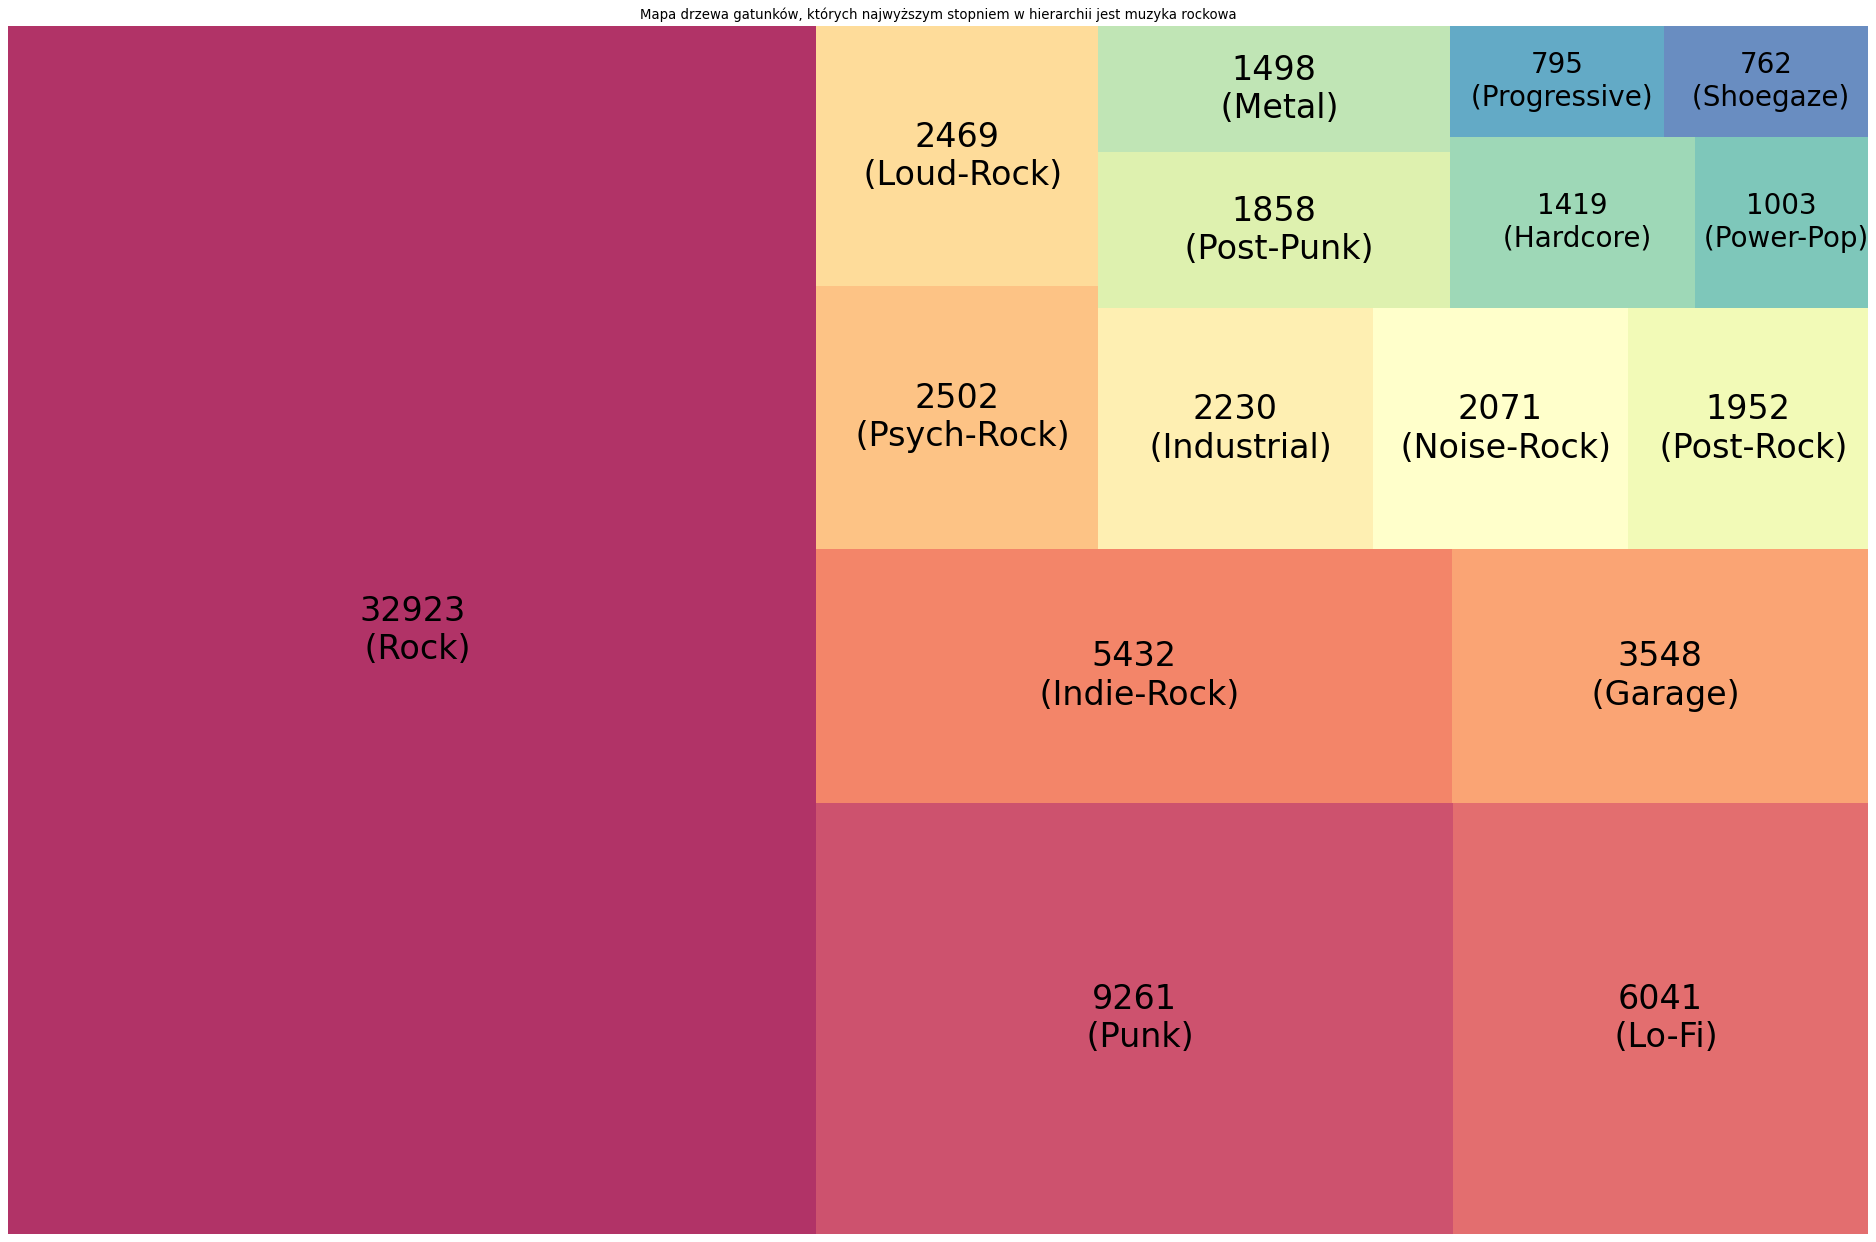

<Figure size 1080x360 with 0 Axes>

In [36]:
genresrock=genresrock[:16]
labels = genresrock.apply(lambda x: str(x[0]) + "\n (" + str(x[2]) + ")", axis=1)
sizes = genresrock['#tracks'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(30,20), dpi= 80)
ax = squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
ax.texts[0].set_size(30)
ax.texts[1].set_size(30)
ax.texts[2].set_size(30)
ax.texts[3].set_size(30)
ax.texts[4].set_size(30)
ax.texts[5].set_size(30)
ax.texts[6].set_size(30)
ax.texts[7].set_size(30)
ax.texts[8].set_size(30)
ax.texts[9].set_size(30)
ax.texts[10].set_size(30)
ax.texts[11].set_size(30)
ax.texts[12].set_size(25)
ax.texts[13].set_size(25)
ax.texts[14].set_size(25)
ax.texts[15].set_size(25)
plt.title('Mapa drzewa gatunków, których najwyższym stopniem w hierarchii jest muzyka rockowa')
plt.axis('off')
plt.show()
plt.savefig('rock.png')

In [14]:
echonest.head()

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        \
                                           metadata                      
         speechiness    tempo   valence  album_date         album_name   
track_id                                                                 
2           0.159310  165.922  0.576661         NaN                NaN   
3           0.461818  126.957  0.269240         NaN                NaN   
5           0.124595  100.260  0.621661         NaN                NaN   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker   
134         0.525519  114.290  0.894072         NaN                NaN   

                                                                             \
                                                                              
         artist_latitude       artist_location artist_longitude artist_name   
track_id                                                                      
2                32.6783           Georgia, US         -83.2230        AWOL   
3                32.6783           Georgia, US         -83.2230        AWOL   
5                32.6783           Georgia, US         -83.2230        AWOL   
10               39.9523  Philadelphia, PA, US         -75.1624   Kurt Vile   
134              32.6783           Georgia, US         -83.2230        AWOL   

                                                                              \
                                               ranks                           
                       release artist_discovery_rank artist_familiarity_rank   
track_id                                                                       
2         AWOL - A Way Of Life                   NaN                     NaN   
3         AWOL - A Way Of Life                   NaN                     NaN   
5         AWOL - A Way Of Life                   NaN                     NaN   
10           Constant Hitmaker                2635.0                  2544.0   
134       AWOL - A Way Of Life                   NaN                     NaN   

                                                                         \
                                                                          
         artist_hotttnesss_rank song_currency_rank song_hotttnesss_rank   
track_id                                                                  
2                           NaN                NaN                  NaN   
3                           NaN                NaN                  NaN   
5                           NaN                NaN                  NaN   
10                        397.0           115691.0              67609.0   
134                         NaN                NaN                  NaN   

                                                                              \
          social_features                                                      
         artist_discovery artist_familiarity artist_hotttnesss song_currency   
track_id                                                                       
2                0.388990           0.386740          0.406370      0.000000   
3                0.388990           0.386740          0.406370      0.000000   
5                0.388990           0.386740          0.406370   

In [15]:
#echonest=echonest['echonest', 'audio_features']
#echonest.head()

In [16]:
fav = tracks.loc[tracks['favorites']>0]
lis = tracks.loc[tracks['listens']>0]

In [17]:
lis

,bit_rate,date_created,duration,favorites,genre_top,genres,genres_all,interest,language_code,listens,title
track_id,,,,,,,,,,,
2,256000,2008-11-26 01:48:12,168,2,Hip-Hop,[21],[21],4656,en,1293,Food
3,256000,2008-11-26 01:48:14,237,1,Hip-Hop,[21],[21],1470,en,514,Electric Ave
5,256000,2008-11-26 01:48:20,206,6,Hip-Hop,[21],[21],1933,en,1151,This World
10,192000,2008-11-25 17:49:06,161,178,Pop,[10],[10],54881,en,50135,Freeway
20,256000,2008-11-26 01:48:56,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",978,en,361,Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...
155316,320000,2017-03-30 15:23:34,162,1,Rock,[25],"[25, 12]",122,NaN,102,The Auger
155317,320000,2017-03-30 15:23:36,217,1,Rock,[25],"[25, 12]",194,NaN,165,Let's Skin Ruby
155318,320000,2017-03-30 15:23:37,404,2,Rock,[25],"[25, 12]",214,NaN,168,My House Smells Like Kim Deal/Pulp


In [18]:
indexlist=fav.index.values.tolist()
lis=lis[lis.index.isin(indexlist)]

In [19]:
lis.shape, fav.shape

((64595, 11), (64595, 11))

In [20]:
name=fav['title']
fav=fav['favorites']
lis=lis['listens']

In [21]:
lfplot=pd.concat([lis, fav, name], axis=1)

In [22]:
lfplot

,listens,favorites,title
track_id,,,
2,1293,2,Food
3,514,1,Electric Ave
5,1151,6,This World
10,50135,178,Freeway
134,943,3,Street Music
...,...,...,...
155315,128,1,Space Power Over-Watch Destroying Evil Rats
155316,102,1,The Auger
155317,165,1,Let's Skin Ruby


In [23]:
lfplot=lfplot.sort_values(by='favorites', ascending=False)

In [24]:
lfplot=lfplot.head(15)
lfplot


,listens,favorites,title
track_id,,,
42377,543252,1482,Night Owl
50582,169675,961,Something Elated
62460,356588,796,Siesta
69170,335215,765,Enthusiast
59541,167315,633,The Temperature of the Air on the Bow of the K...
84990,374497,600,Hachiko (The Faithtful Dog)
66053,468163,600,Springish
86599,429168,599,Epic Song
55718,178139,554,Kopeika


In [25]:
x=lfplot['title']

In [26]:
y1=lfplot['listens']
y2=lfplot['favorites']

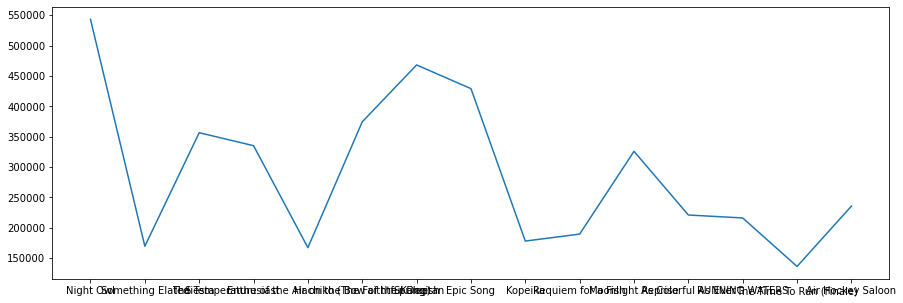

In [27]:
fig, ax = plt.subplots()
ax.plot(x, y1)

In [28]:
dates=tracks.sort_values(by="date_created")

In [29]:
dates

,bit_rate,date_created,duration,favorites,genre_top,genres,genres_all,interest,language_code,listens,title
track_id,,,,,,,,,,,
10,192000,2008-11-25 17:49:06,161,178,Pop,[10],[10],54881,en,50135,Freeway
2010,256000,2008-11-25 18:18:06,345,7,NaN,"[4, 118]","[2, 4, 118]",6545,en,3756,Green Eyes
694,160000,2008-11-25 21:13:08,291,17,Hip-Hop,[21],[21],7007,en,7883,Planet Say (featuring Faust)
458,256000,2008-11-25 22:01:05,223,11,Rock,[36],"[36, 12]",1824,en,1241,Hunt Like Devil 4
459,128000,2008-11-25 22:01:08,301,45,Rock,[36],"[36, 12]",11132,en,7765,Machines and Muscles
...,...,...,...,...,...,...,...,...,...,...,...
155315,320000,2017-03-30 15:23:33,38,1,Rock,[25],"[25, 12]",153,NaN,128,Space Power Over-Watch Destroying Evil Rats
155316,320000,2017-03-30 15:23:34,162,1,Rock,[25],"[25, 12]",122,NaN,102,The Auger
155317,320000,2017-03-30 15:23:36,217,1,Rock,[25],"[25, 12]",194,NaN,165,Let's Skin Ruby


In [30]:
df=tracks
df=df.groupby(pd.Grouper(key='date_created', freq='Y')).sum()

In [31]:
df

,bit_rate,duration,favorites,interest,listens
date_created,,,,,
2008-12-31,663870757,848268,5296,4678550,2406190
2009-12-31,2579648433,3031639,30096,27422247,15458638
2010-12-31,3212558520,3612863,43764,38782578,21893879
2011-12-31,2969121490,3343819,47389,53124853,27854173
2012-12-31,3315096552,3349401,52930,59499634,35006975
2013-12-31,3711656422,3707049,43500,57992867,39046677
2014-12-31,2609401683,2837946,30029,35906523,26885781
2015-12-31,3552937964,3293801,42292,48620372,38260438
2016-12-31,4191146900,4371034,38872,46914660,37799199


In [32]:
#Y=df['listens']
Y=[2406190,15458638,21893879,27854173,35006975,39046677,26885781,38260438,37799199,3636575]
X=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]


In [33]:
ax.plot(X,Y)
plt.show()